In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [29]:
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [30]:
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id=468)
x = dataset.data.features
y = dataset.data.targets

In [31]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [32]:
y.head()

,Revenue
0,False
1,False
2,False
3,False
4,False


In [33]:
x.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64

In [34]:
y.isnull().sum()

Revenue    0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

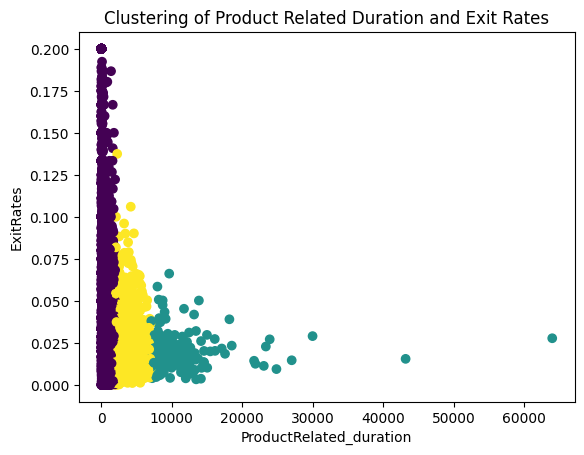

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x[['ProductRelated_Duration', 'ExitRates']])
x['cluster_number'] = kmeans.labels_

plt.scatter(x=x['ProductRelated_Duration'], y=x['ExitRates'],c=x['cluster_number'])
plt.xlabel("ProductRelated_duration")
plt.ylabel("ExitRates")
plt.title("Clustering of Product Related Duration and Exit Rates")
plt.show

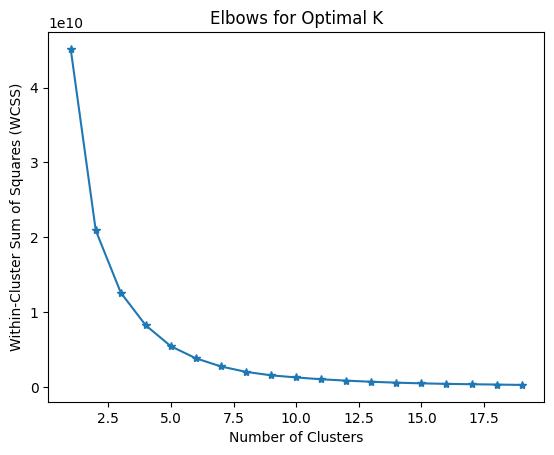

In [40]:
from sklearn.datasets import make_blobs

k_vals = range(1,20)
elbows = []

for k in k_vals:
    kmeans = KMeans(n_clusters=k, random_state=14)
    kmeans.fit(x[['ProductRelated_Duration', 'BounceRates']])
    elbows.append(kmeans.inertia_)
plt.plot(k_vals, elbows, marker='*')
plt.title("Elbows for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.show()

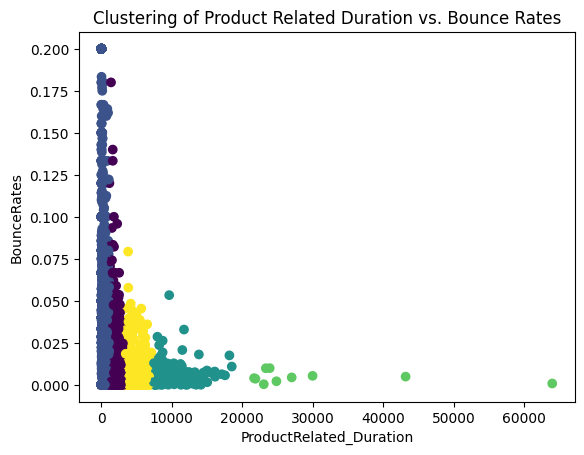

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(x[['ProductRelated_Duration','BounceRates']])
labels = kmeans.labels_
x['cluster_number'] = labels

plt.scatter(x=x['ProductRelated_Duration'], y=x['BounceRates'], c=x['cluster_number'])
plt.xlabel("ProductRelated_Duration")
plt.ylabel("BounceRates")
plt.title("Clustering of Product Related Duration vs. Bounce Rates")
plt.show()

In [50]:
from sklearn.metrics import silhouette_score

silhoette = silhouette_score(x[['ProductRelated_Duration','BounceRates']],labels)
print("silhoette Score: ",silhoette*100)

silhoette Score:  65.37911320907187


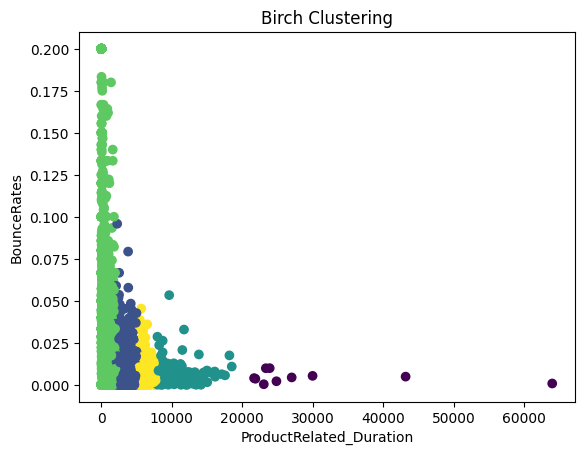

In [57]:
from sklearn.cluster import Birch

cluster = 5

birch = Birch(n_clusters=cluster)

birch.fit(x[['ProductRelated_Duration', 'BounceRates']])
blabels = birch.labels_

plt.scatter(x['ProductRelated_Duration'], x['BounceRates'], c=blabels, cmap='viridis')
plt.title("Birch Clustering")
plt.xlabel("ProductRelated_Duration")
plt.ylabel("BounceRates")
plt.show()

In [60]:
from sklearn.metrics import silhouette_score
b_silhouette = silhouette_score(x[['ProductRelated_Duration','BounceRates']],blabels)
print("Silhoette Score: ", b_silhouette*100)

Silhoette Score:  68.58473443144088
